In [57]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('exchange_rate.csv', index_col=0, parse_dates= True)
df

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


<Axes: xlabel='date'>

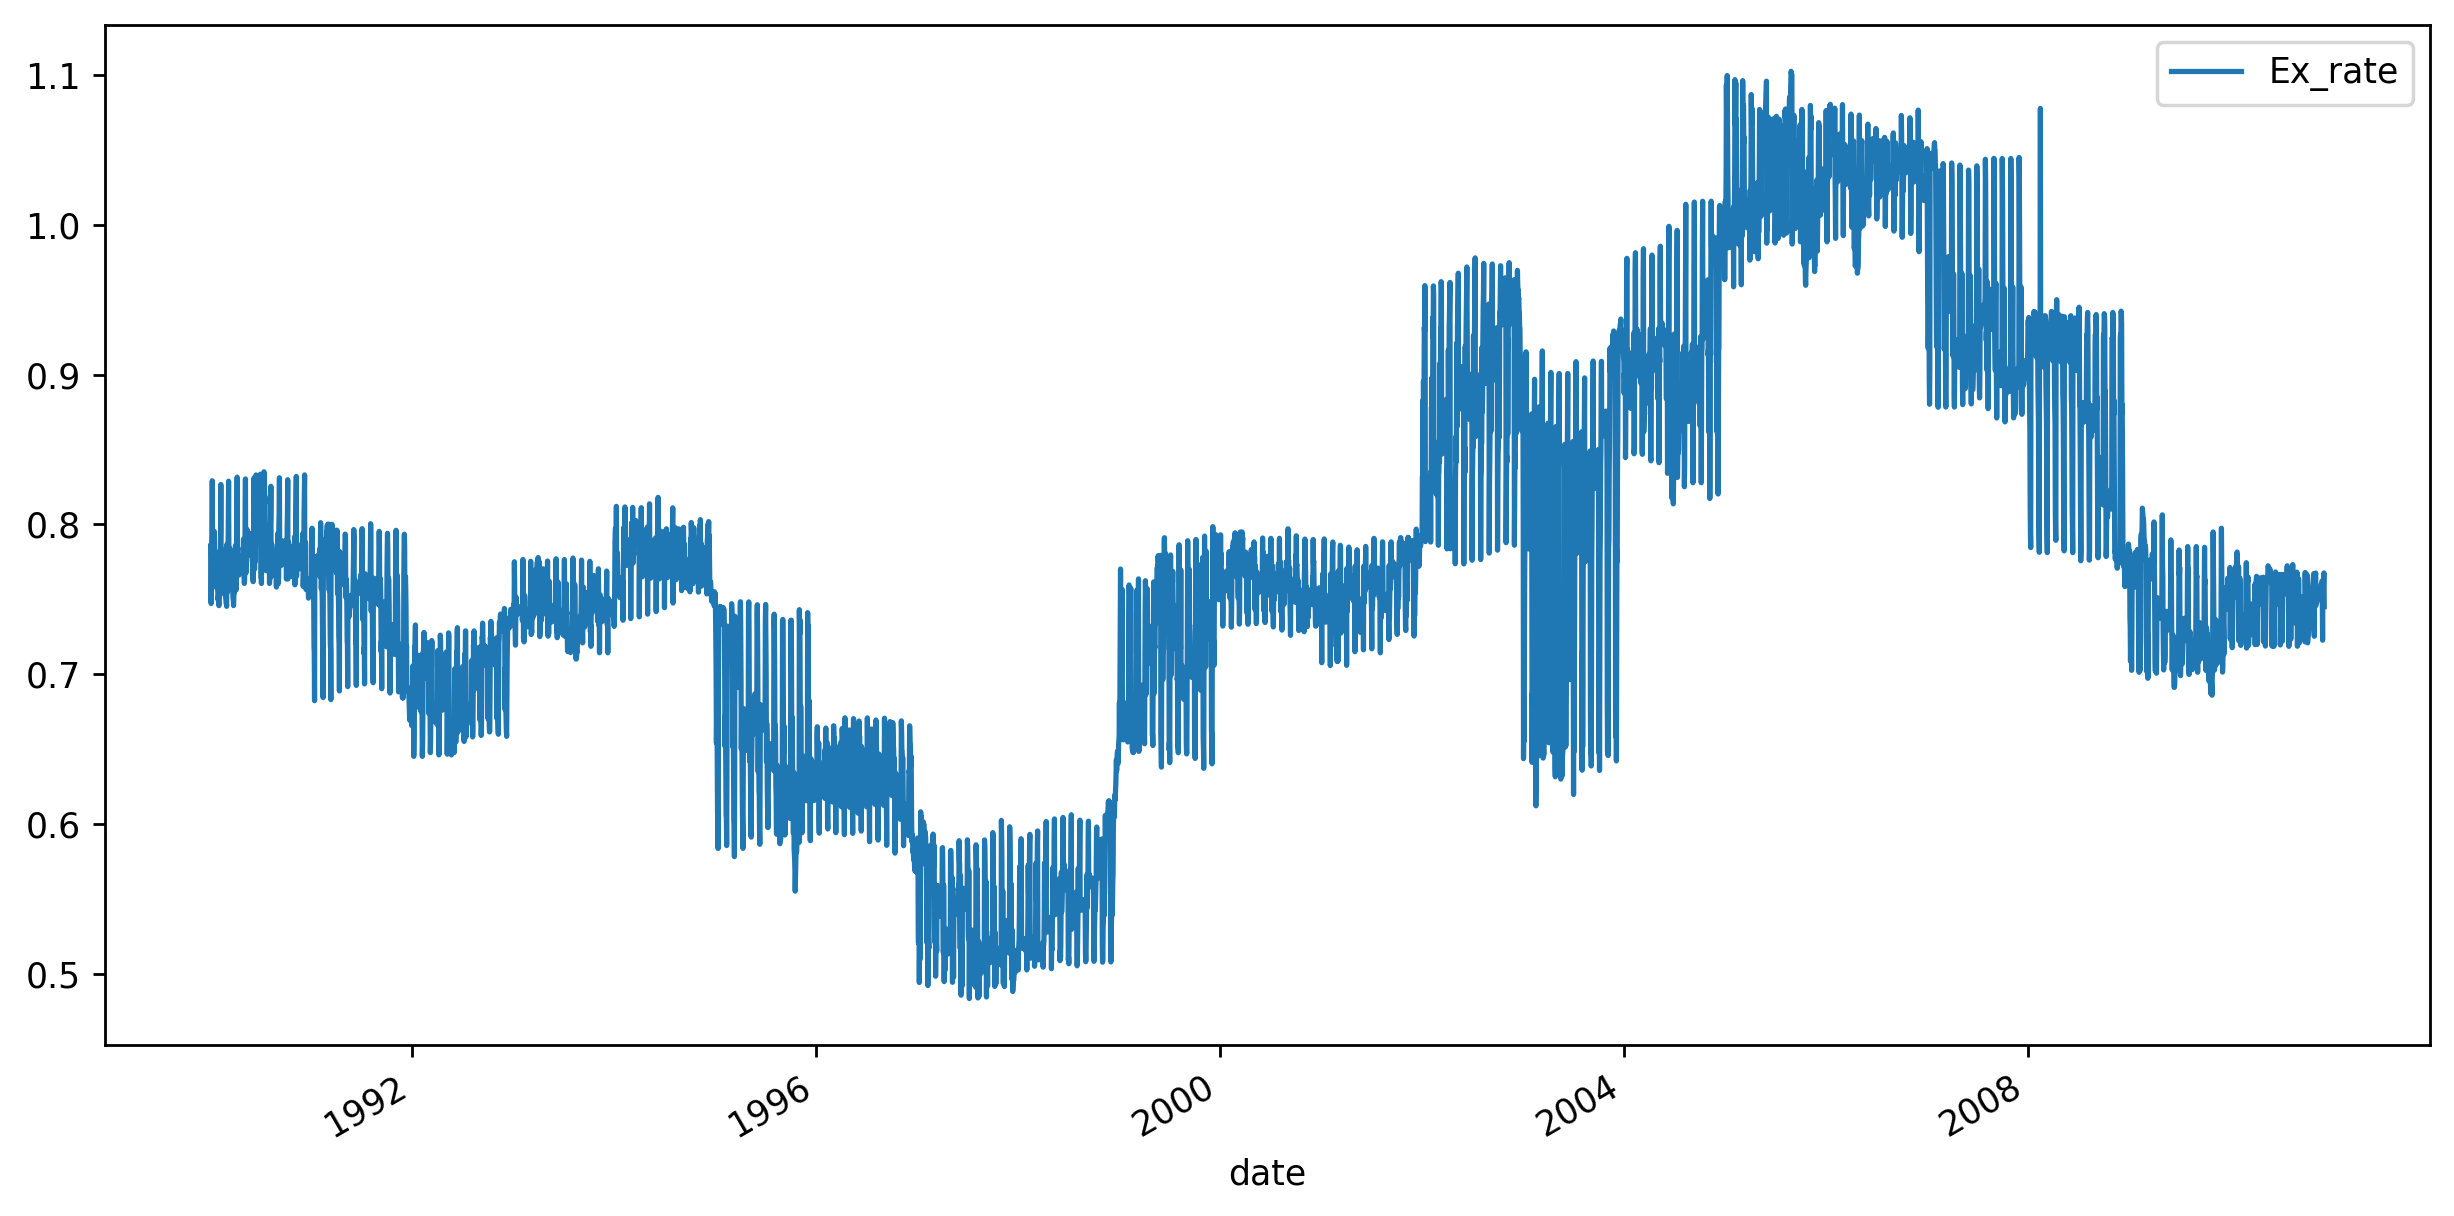

In [18]:
# Plotting lineplot for checking data is stationary or non-stationary
plt.rcParams['figure.figsize'] = (12,6)
df.plot()

The data is non-stationary. It follows trend 

In [19]:
# To check the type of data whether it is non-stationary, running a adfuller testto check vlaues of (p, d, q)
# This adfuller test performs Hypothesis test and concludes type of data

# Null Hypothesis = Data is Non-Stationary
# Alternate Hypothesis = Data is Stationary
# if p-value < 0.05 -> Data is Stationary
# if p-value > 0.05 -> Data is Non-Stationary
adfuller(df['Ex_rate'])[1]

0.4492327353597959

Here p-value is 0.45 which is > 0.05, so Data is Non-Stationary

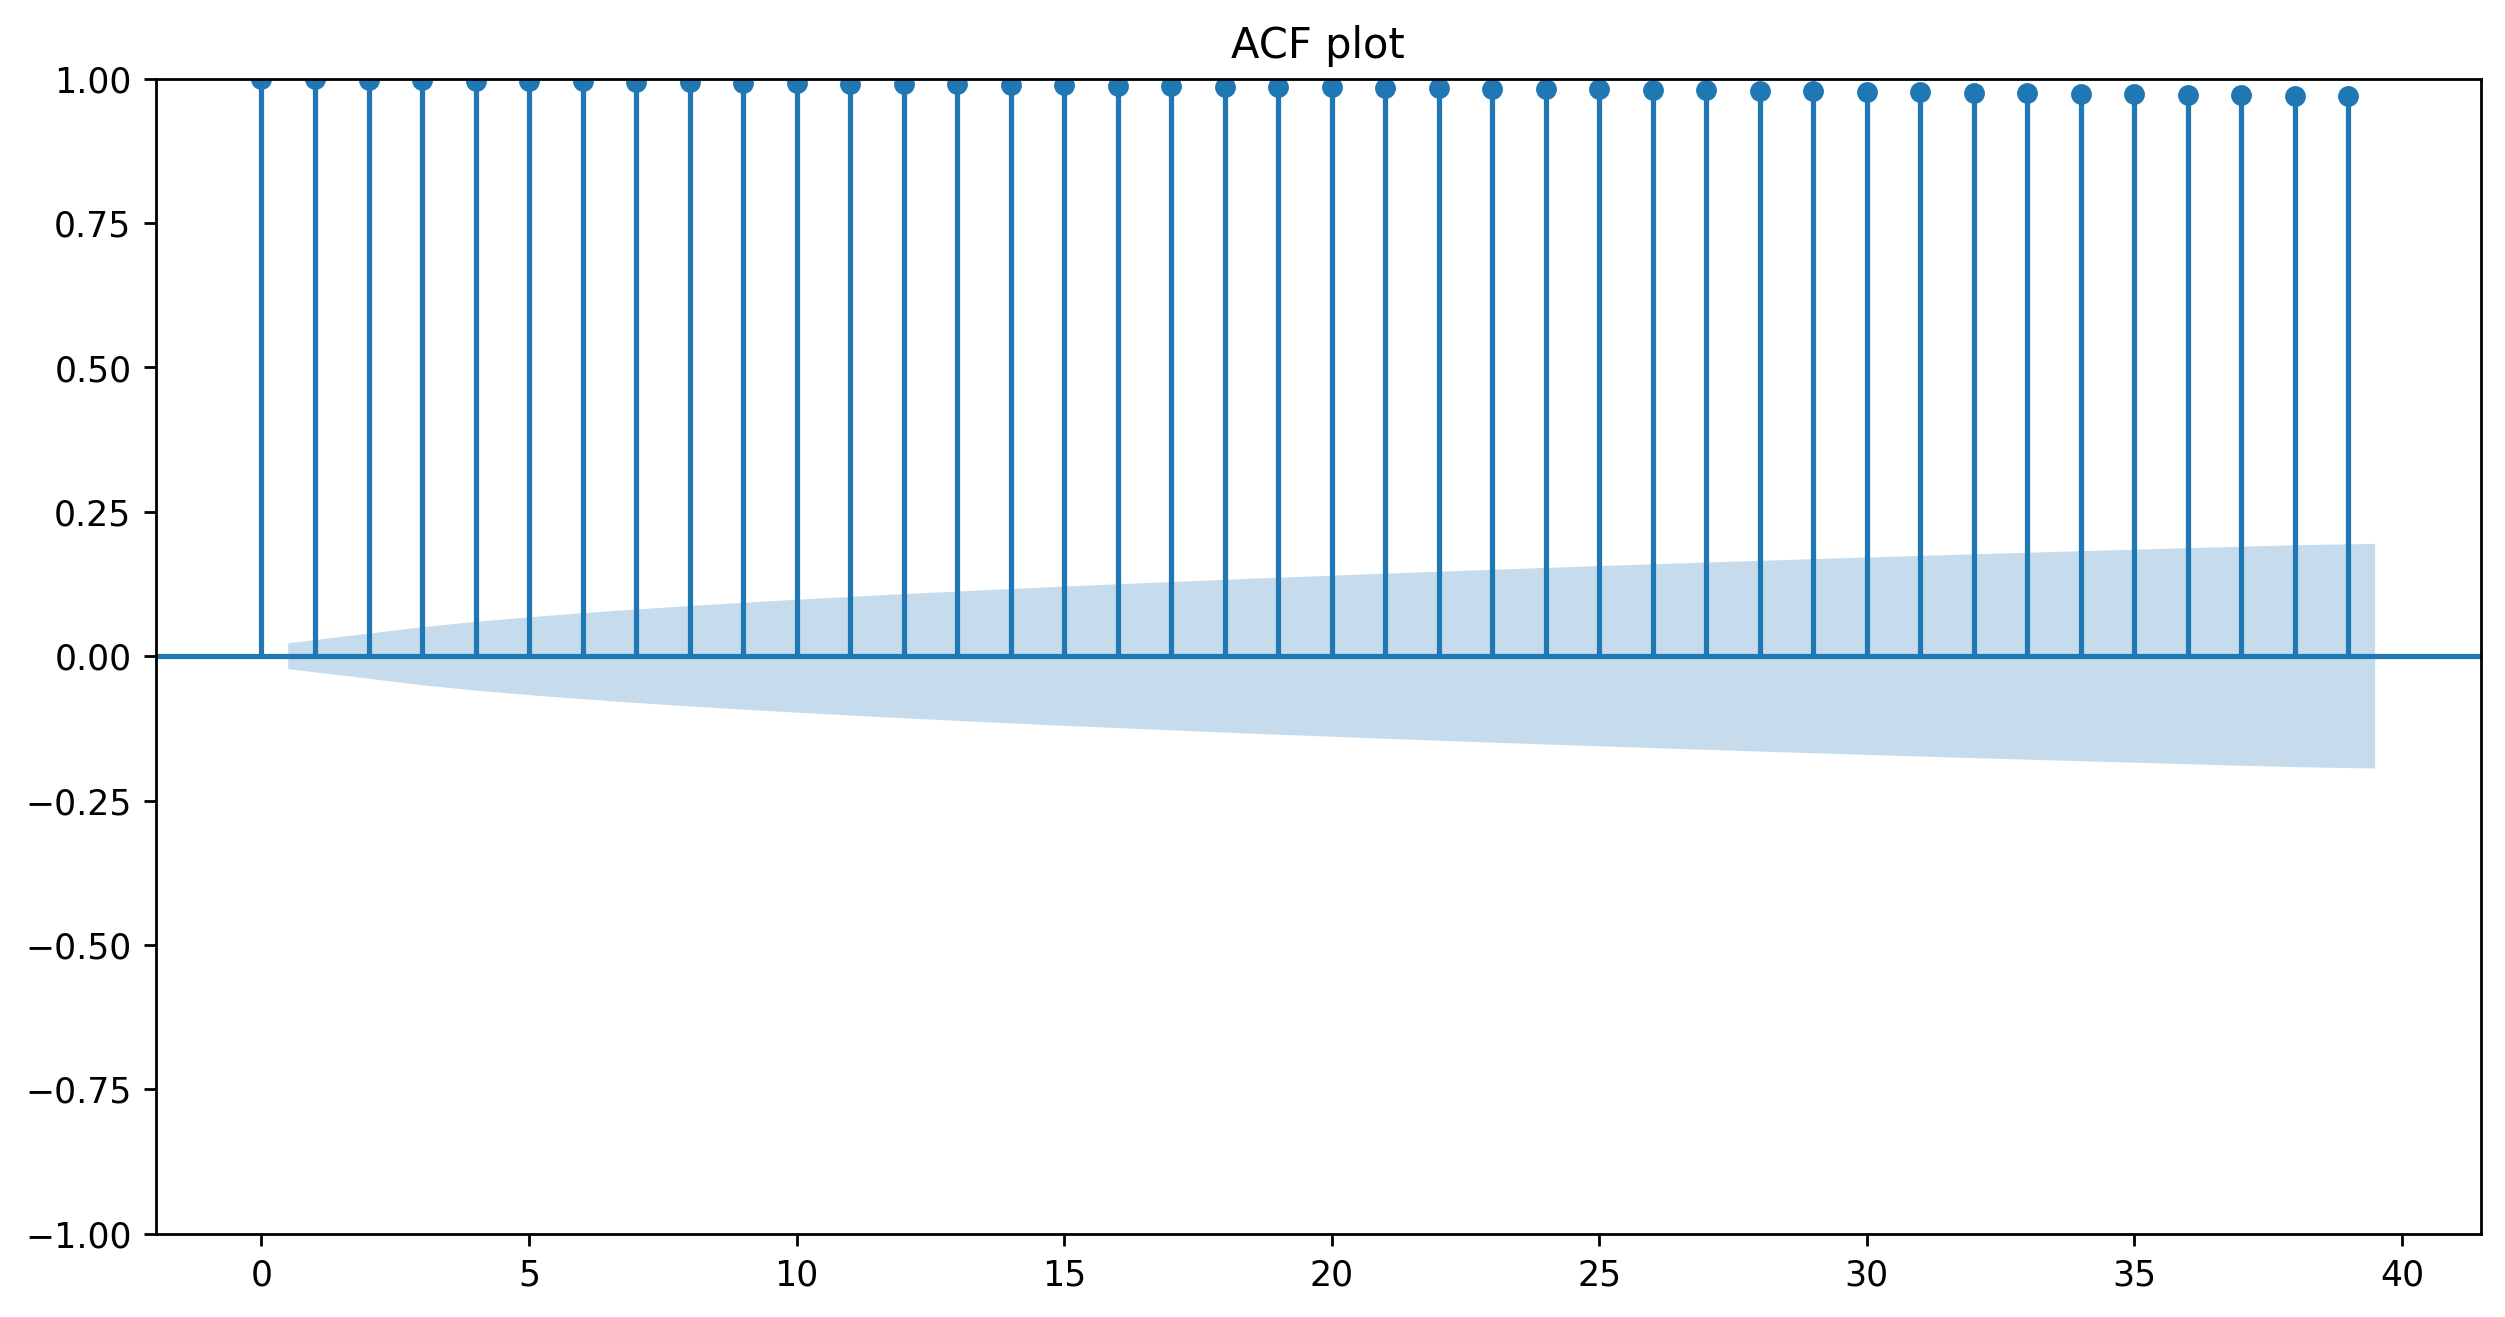

<Figure size 2500x1000 with 0 Axes>

In [45]:
# Plotting ACF Plot to check Autocorrelation 
plot_acf(df, ax=plt.gca())
plt.title('ACF plot')
plt.figure(figsize=(10, 4))
plt.show()

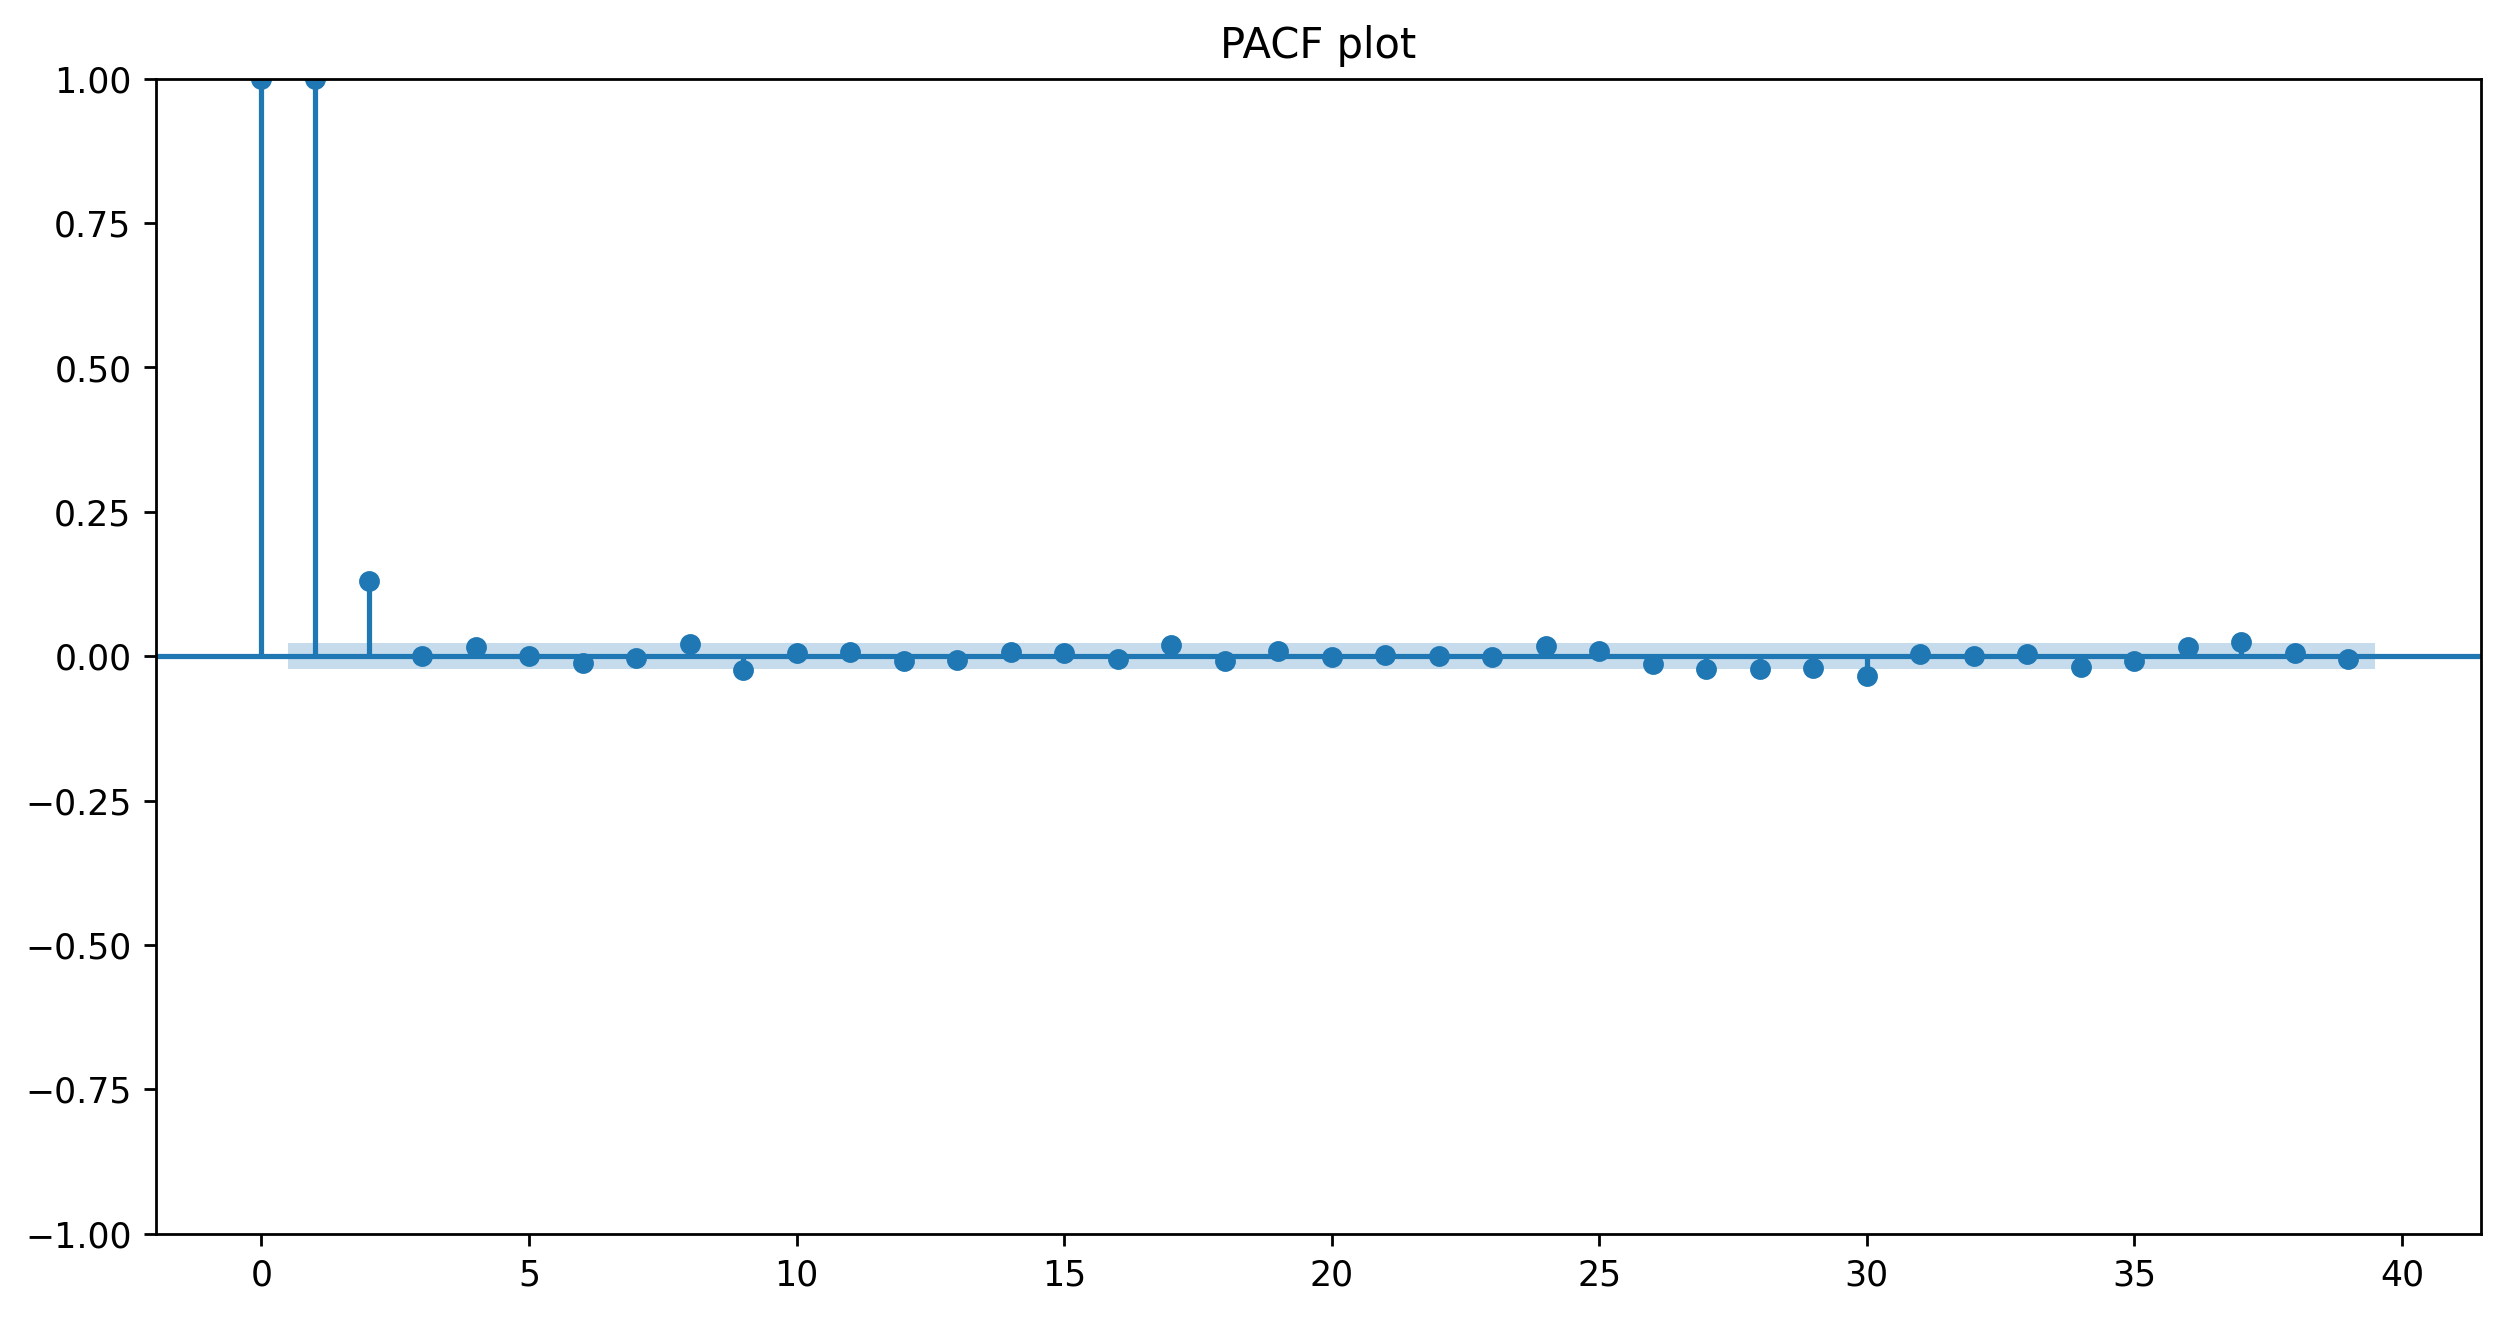

In [46]:
# Ploting PACF plot
plot_pacf(df, ax=plt.gca())
plt.title('PACF plot')
plt.show()

In [21]:
# ARIMA Model Building

In [7]:
order = auto_arima(df['Ex_rate'])
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

This auto_arima will calculate everyting including ACF, PACF value, Standard Error, Which values are ststistically significant, performs differencing out, see for data is converted to stationary or not

Here it has calculated the (p, d, q)values and ,

p-value = 1 i.e. only 1 lag lag variable is statistically significant

d-value = 1 i.e. 1 time differencing is required because data is Non-Stationary

q-value = 0 i.e. There are 0 error datapoints which are statistically significant

In [8]:
df.shape

(7588, 1)

In [23]:
# Split data for Training and Testing
train = df.iloc[:-100]
test = df.iloc[-100:]

In [10]:
train.shape

(7488, 1)

In [11]:
test.shape

(100, 1)

In [24]:
# Creating ARIMA Model
model = ARIMA(train['Ex_rate'], order = (1,1,0)).fit()

In [25]:
#Evaluate Model
test

,Ex_rate
date,
2010-03-07,0.761470
2010-04-07,0.762369
2010-05-07,0.762369
2010-06-07,0.764029
2010-07-07,0.766577
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [28]:
ypred = model.predict(start = 7489, end = 7588)
ypred

7489    0.763311
7490    0.763298
7491    0.763299
7492    0.763299
7493    0.763299
          ...   
7584    0.763299
7585    0.763299
7586    0.763299
7587    0.763299
7588    0.763299
Name: predicted_mean, Length: 100, dtype: float64

In [29]:
ypred.shape

(100,)

In [30]:
# Checking RMSE value
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.020560865176761103


Here we got 0.02 as RMSE value which very close to 0. It Means our model performance is very good.

In [32]:
# df['Date'] = pd.to_datetime(df.date, format = '%d - %b - %y')
# df['t'] = range(1, 7589)
# df['log_Ex_rate'] = np.log(df['Ex_rate'])
# df['Month'] = df['date'].dt.strftime('%b')

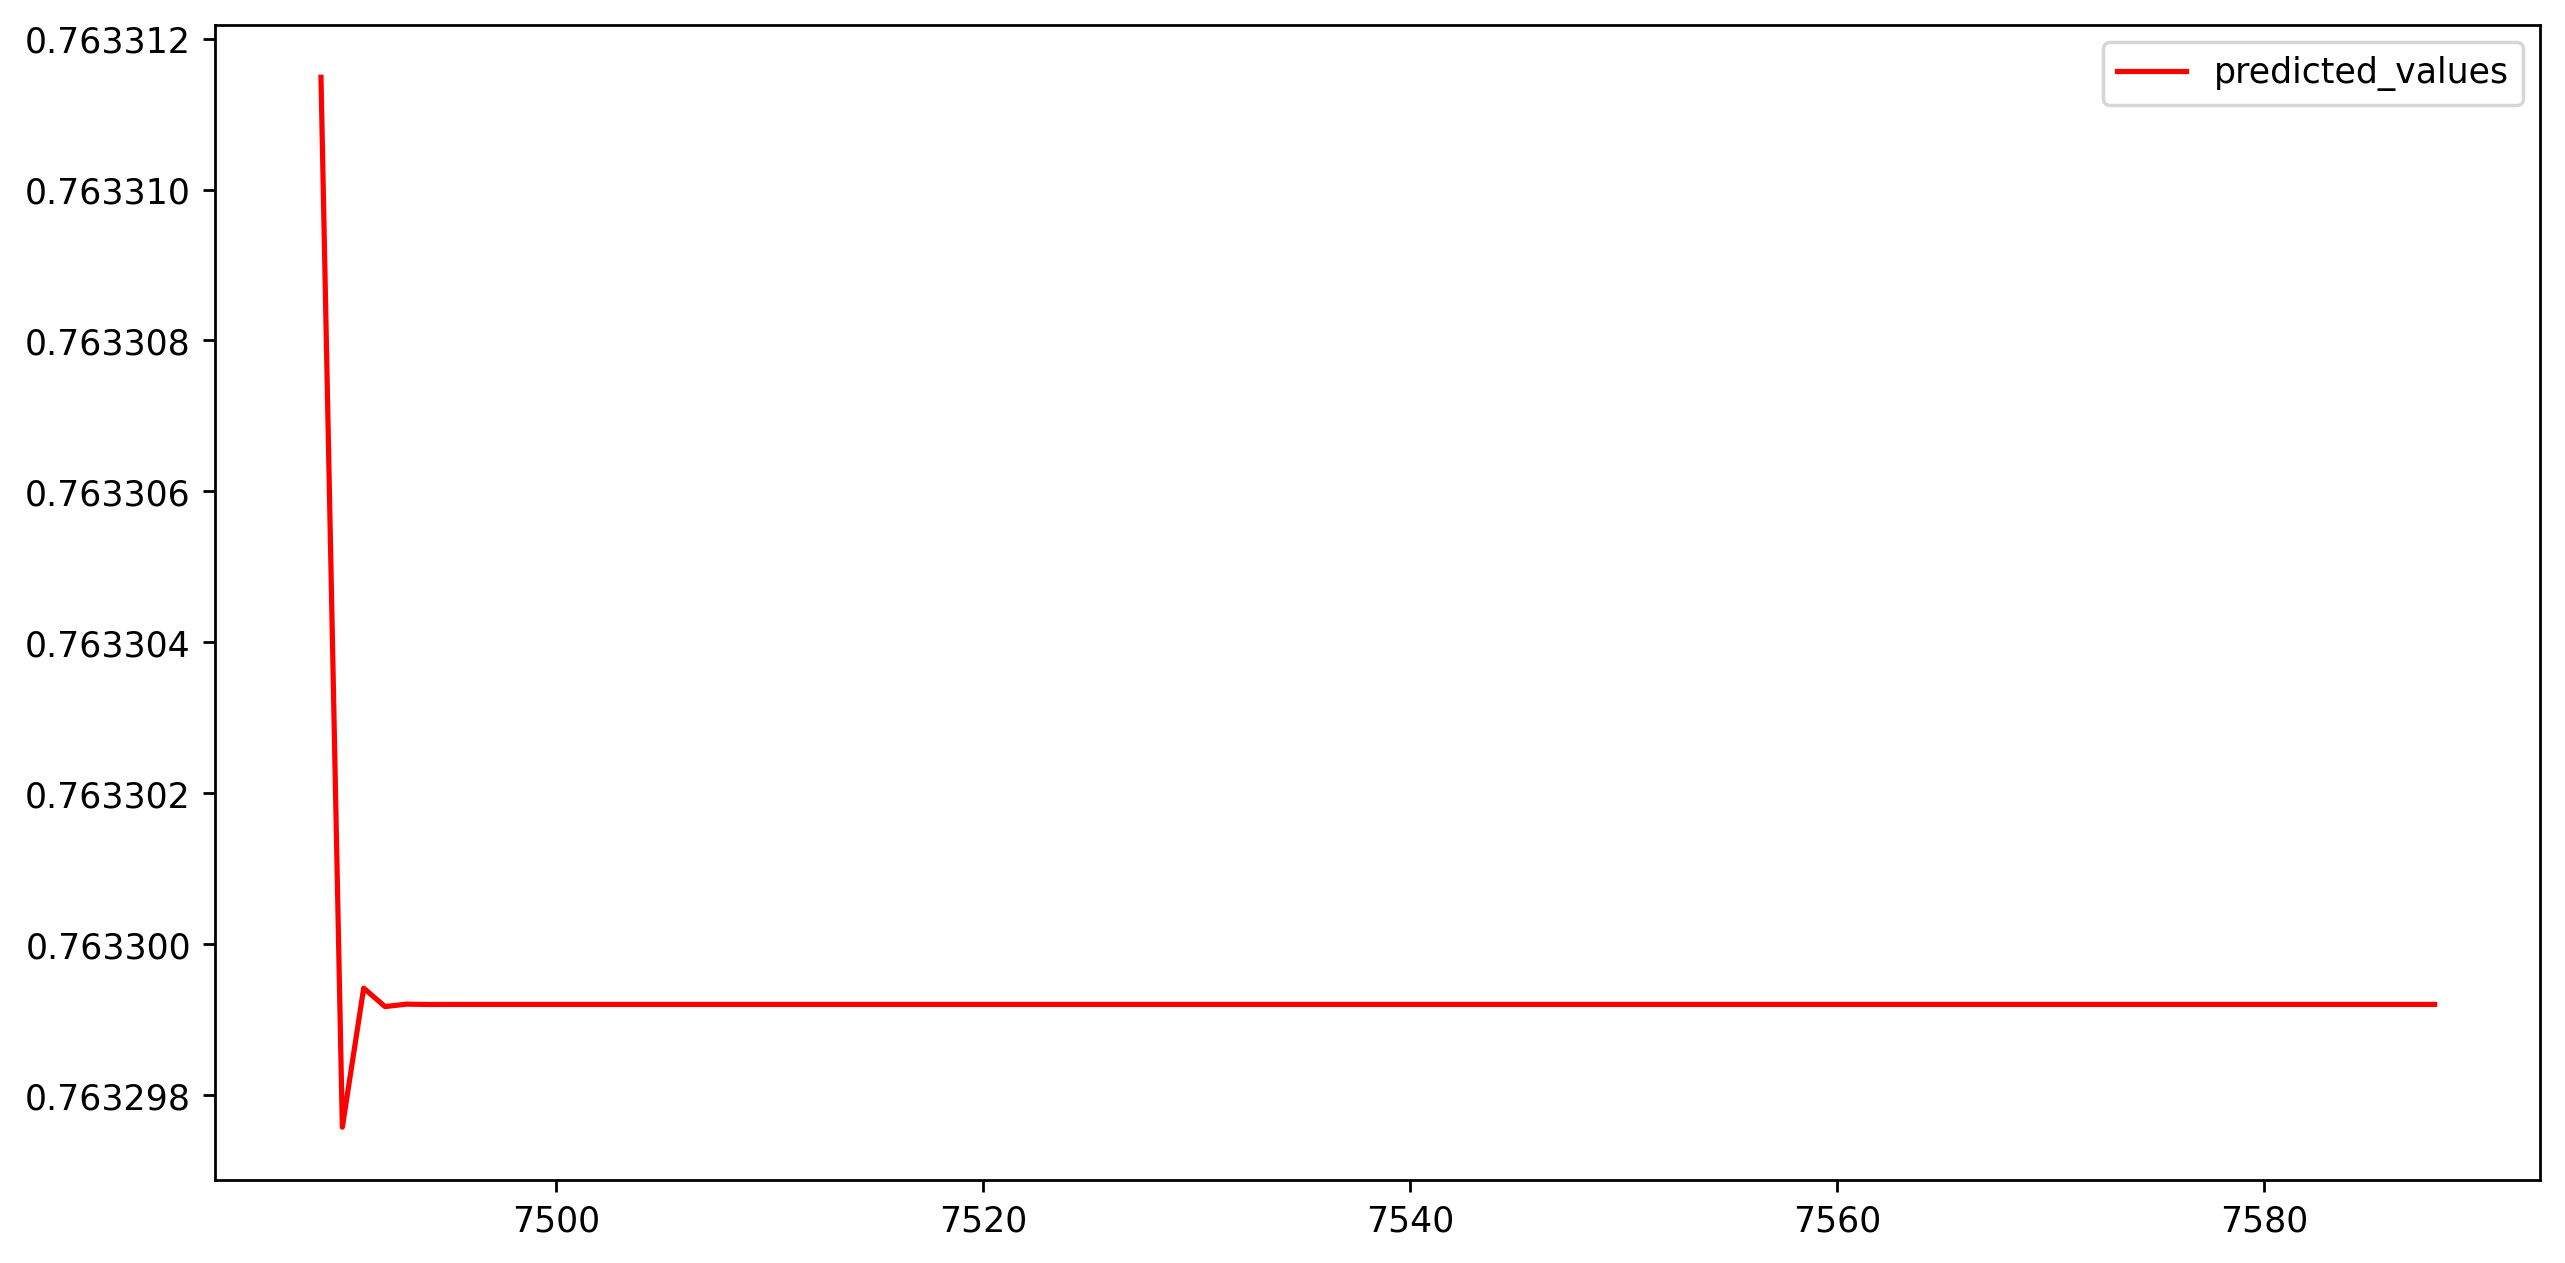

In [53]:
ypred.plot(color = 'red', label = 'predicted_values')
plt.legend()
plt.show()

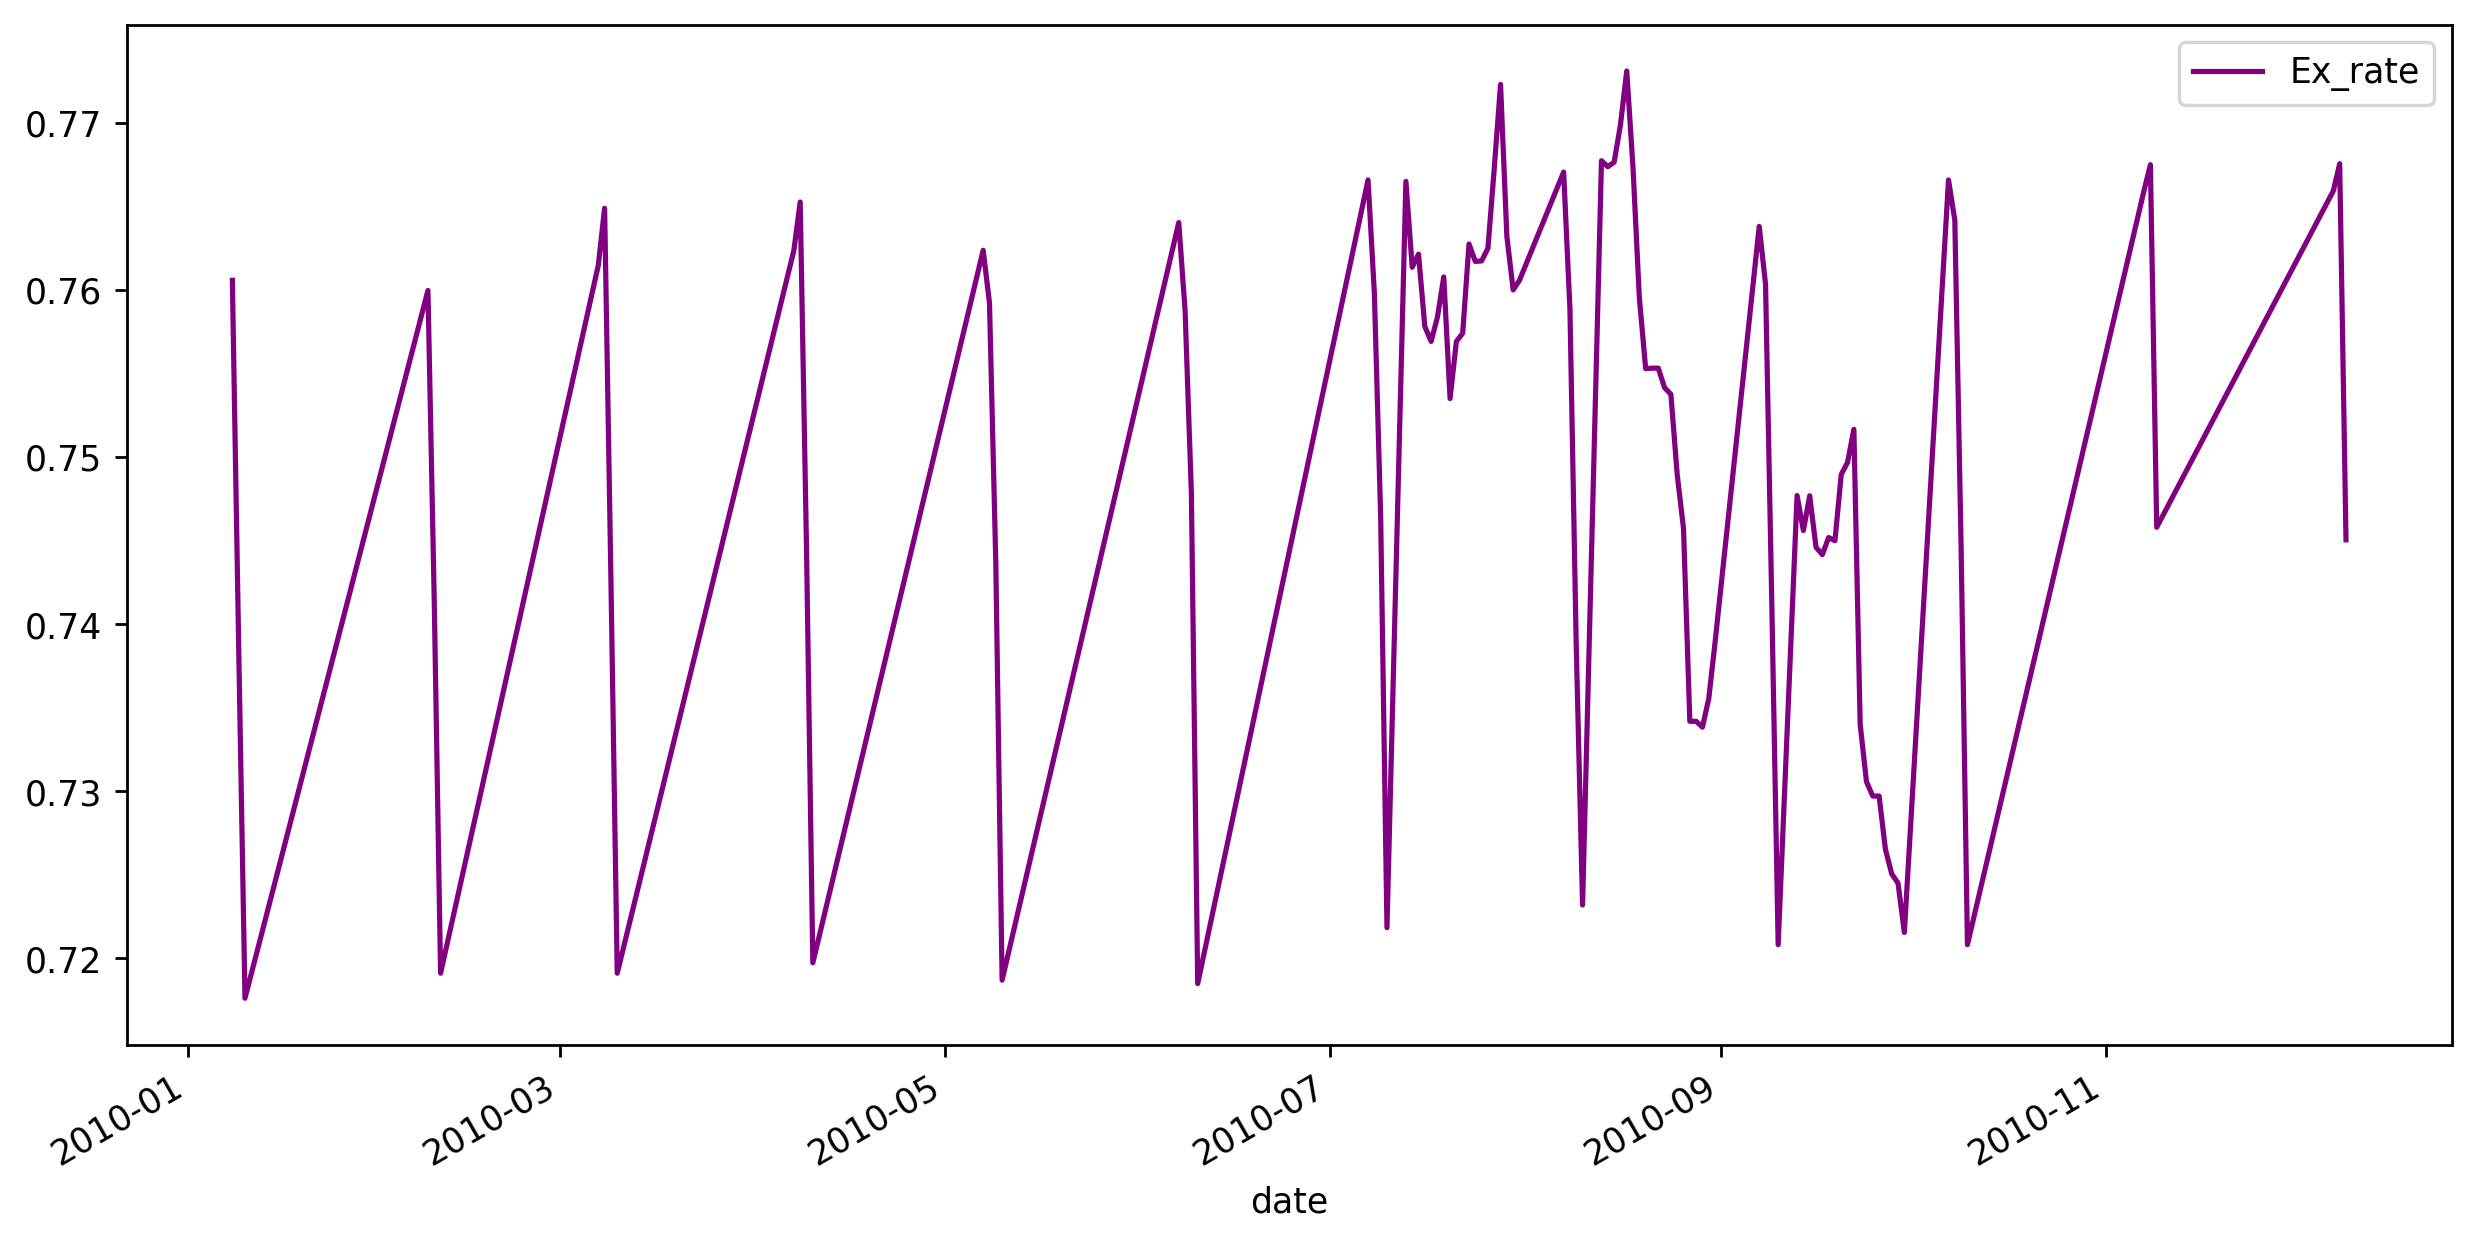

In [54]:
test.plot(color = 'purple', label = 'test_values')
plt.legend()
plt.show()

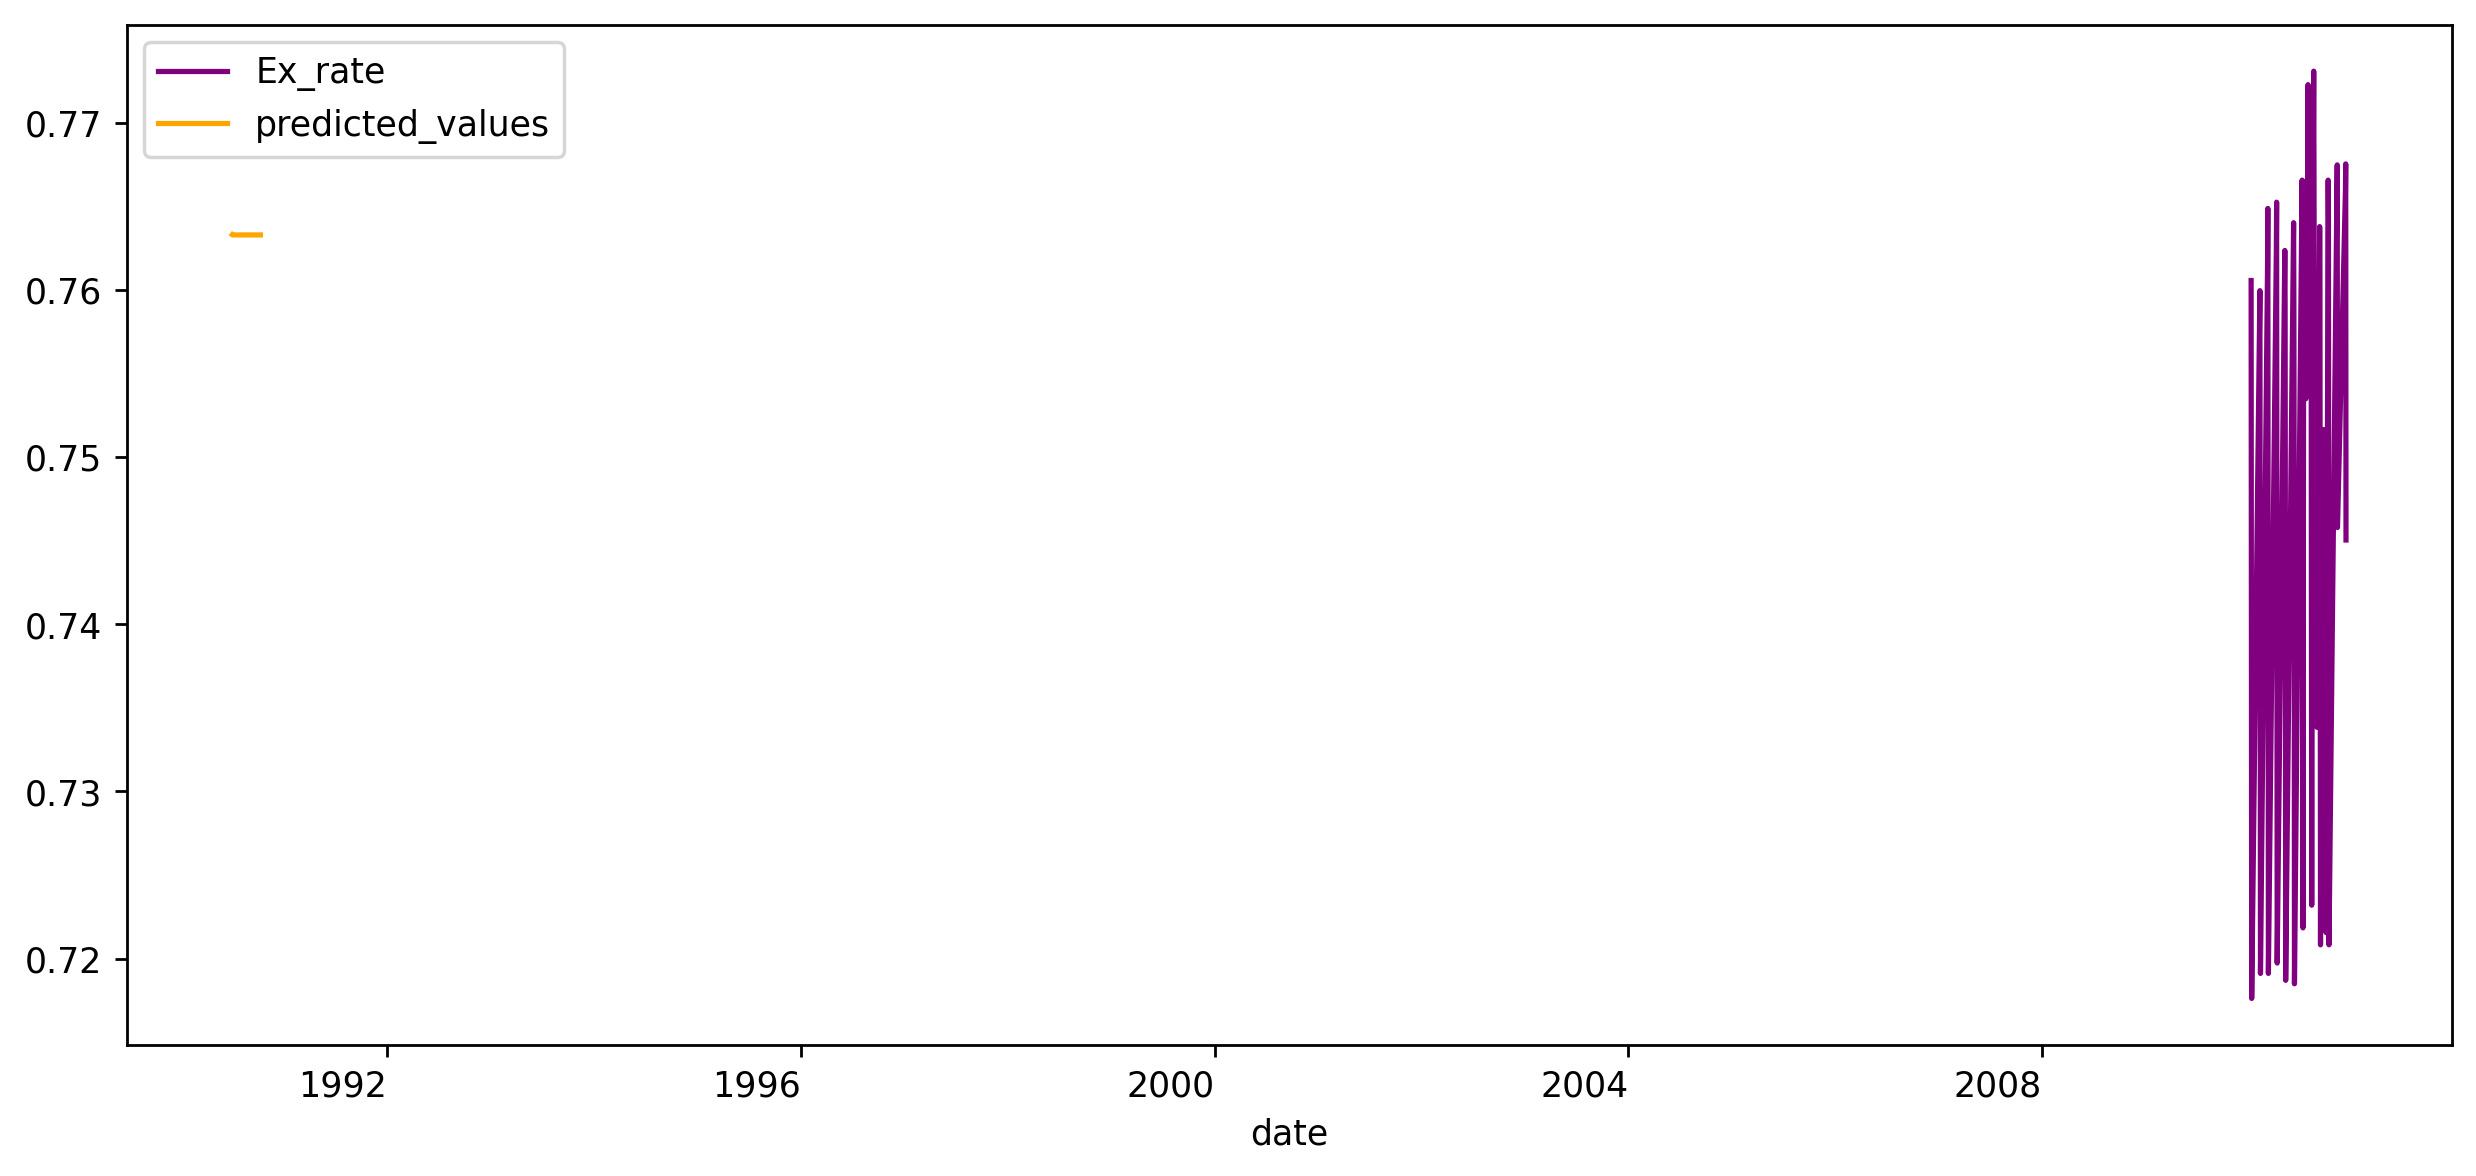

In [55]:
test.plot(color = 'purple', label = 'test_values')
ypred.plot(color = 'orange', label = 'predicted_values')
plt.legend()
plt.show()

In [56]:
# We san see that there is some difference of 0.0 in predicted values.

<Axes: xlabel='date'>

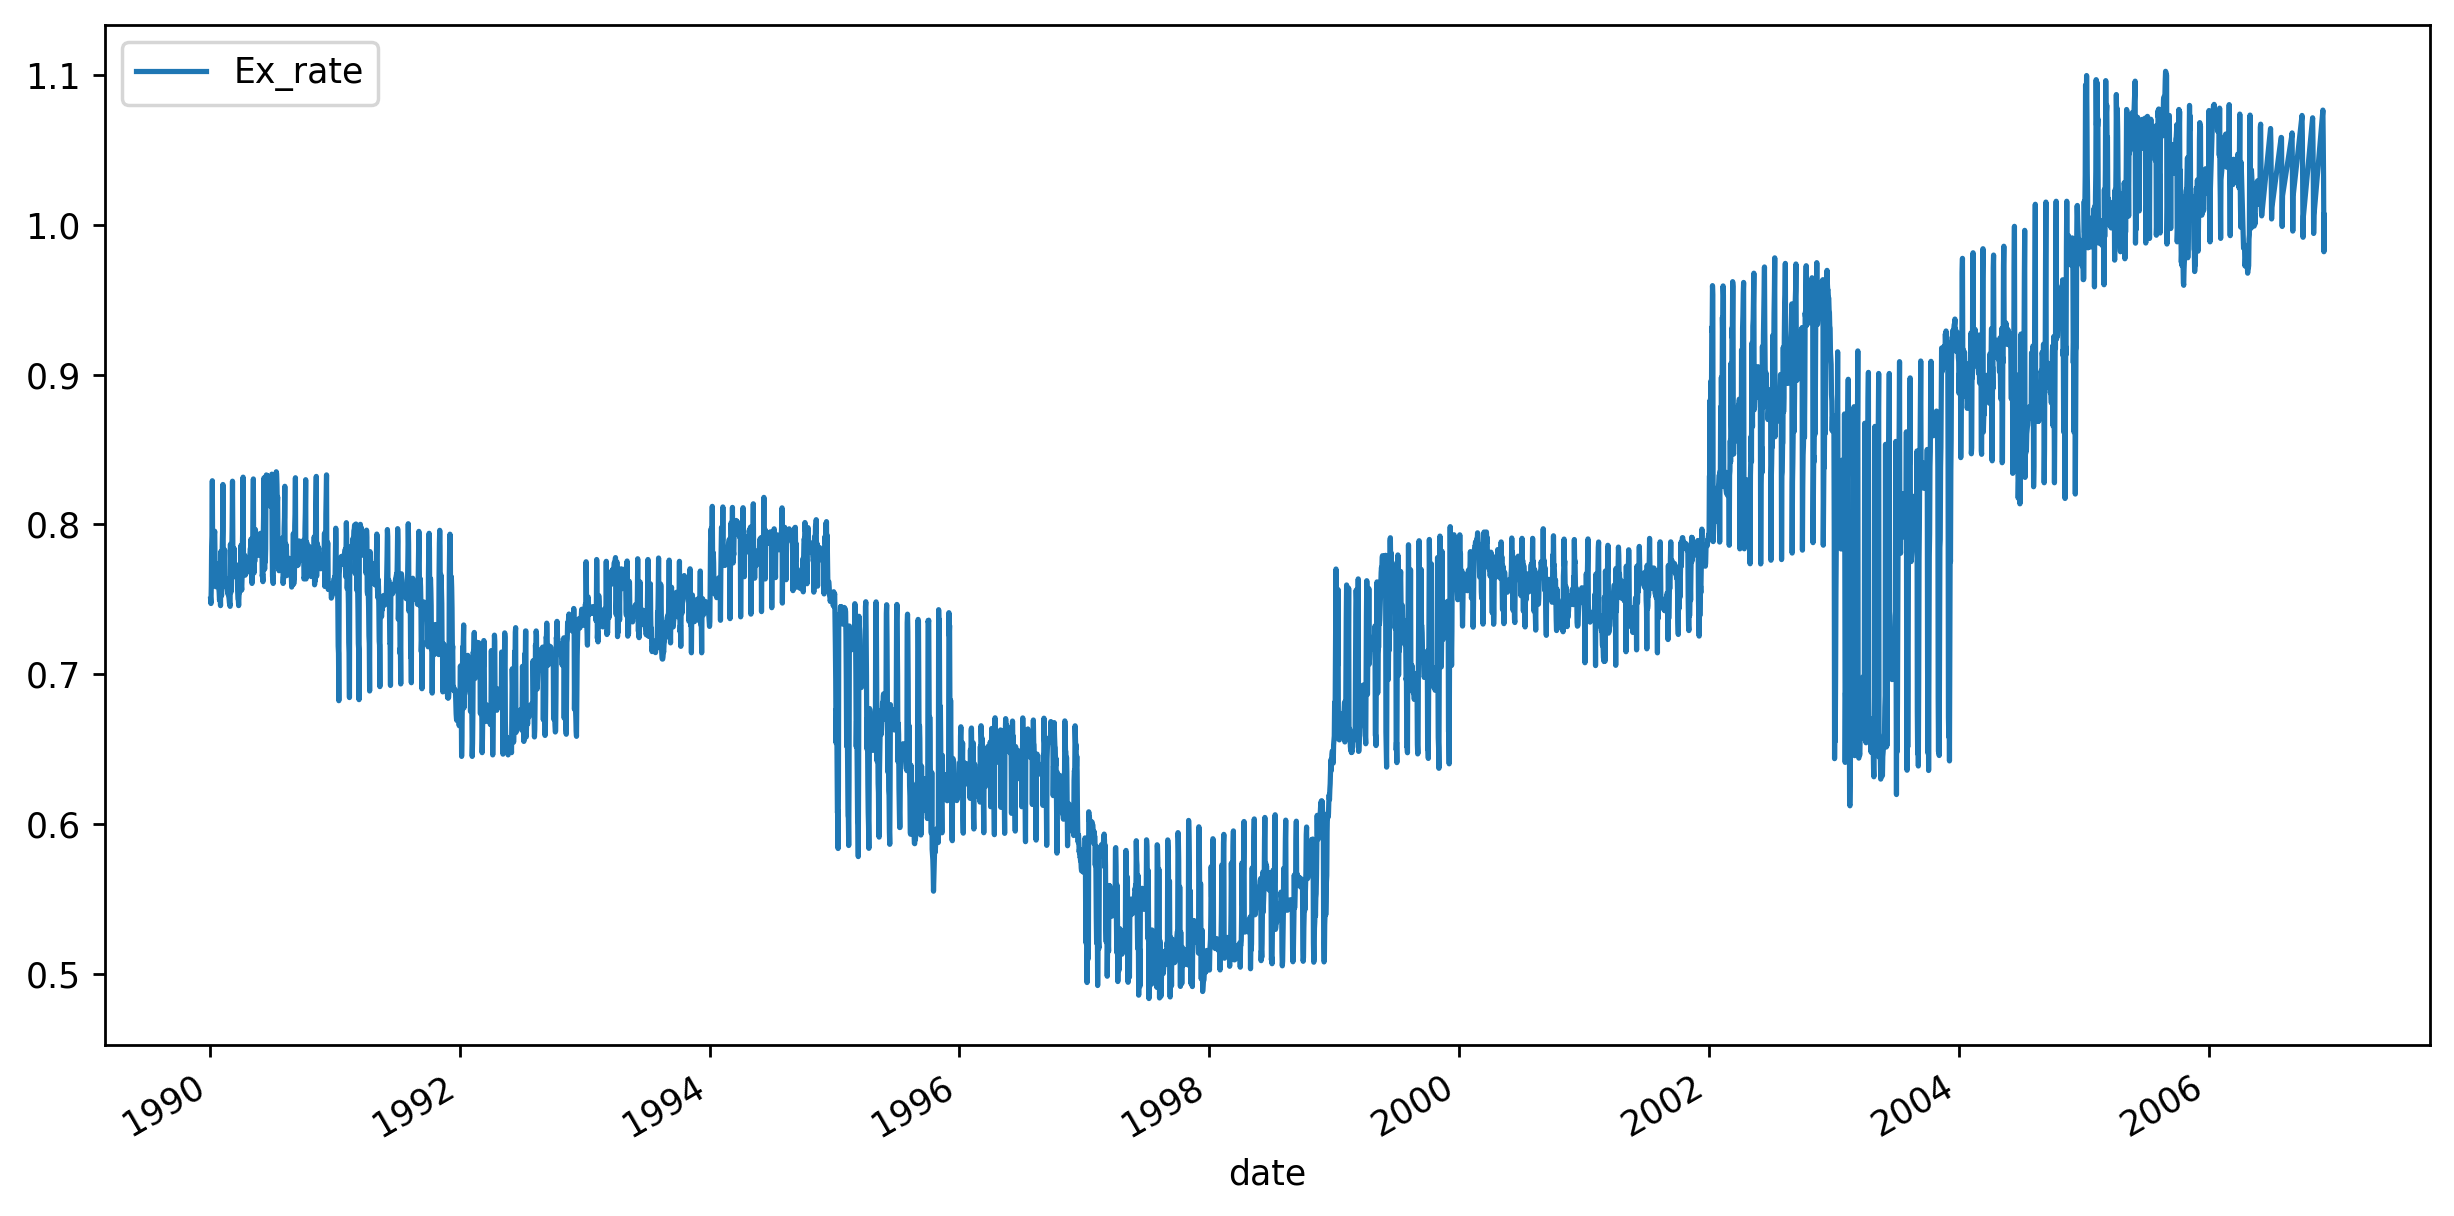

In [87]:
data = df[1:6000]
data.plot()

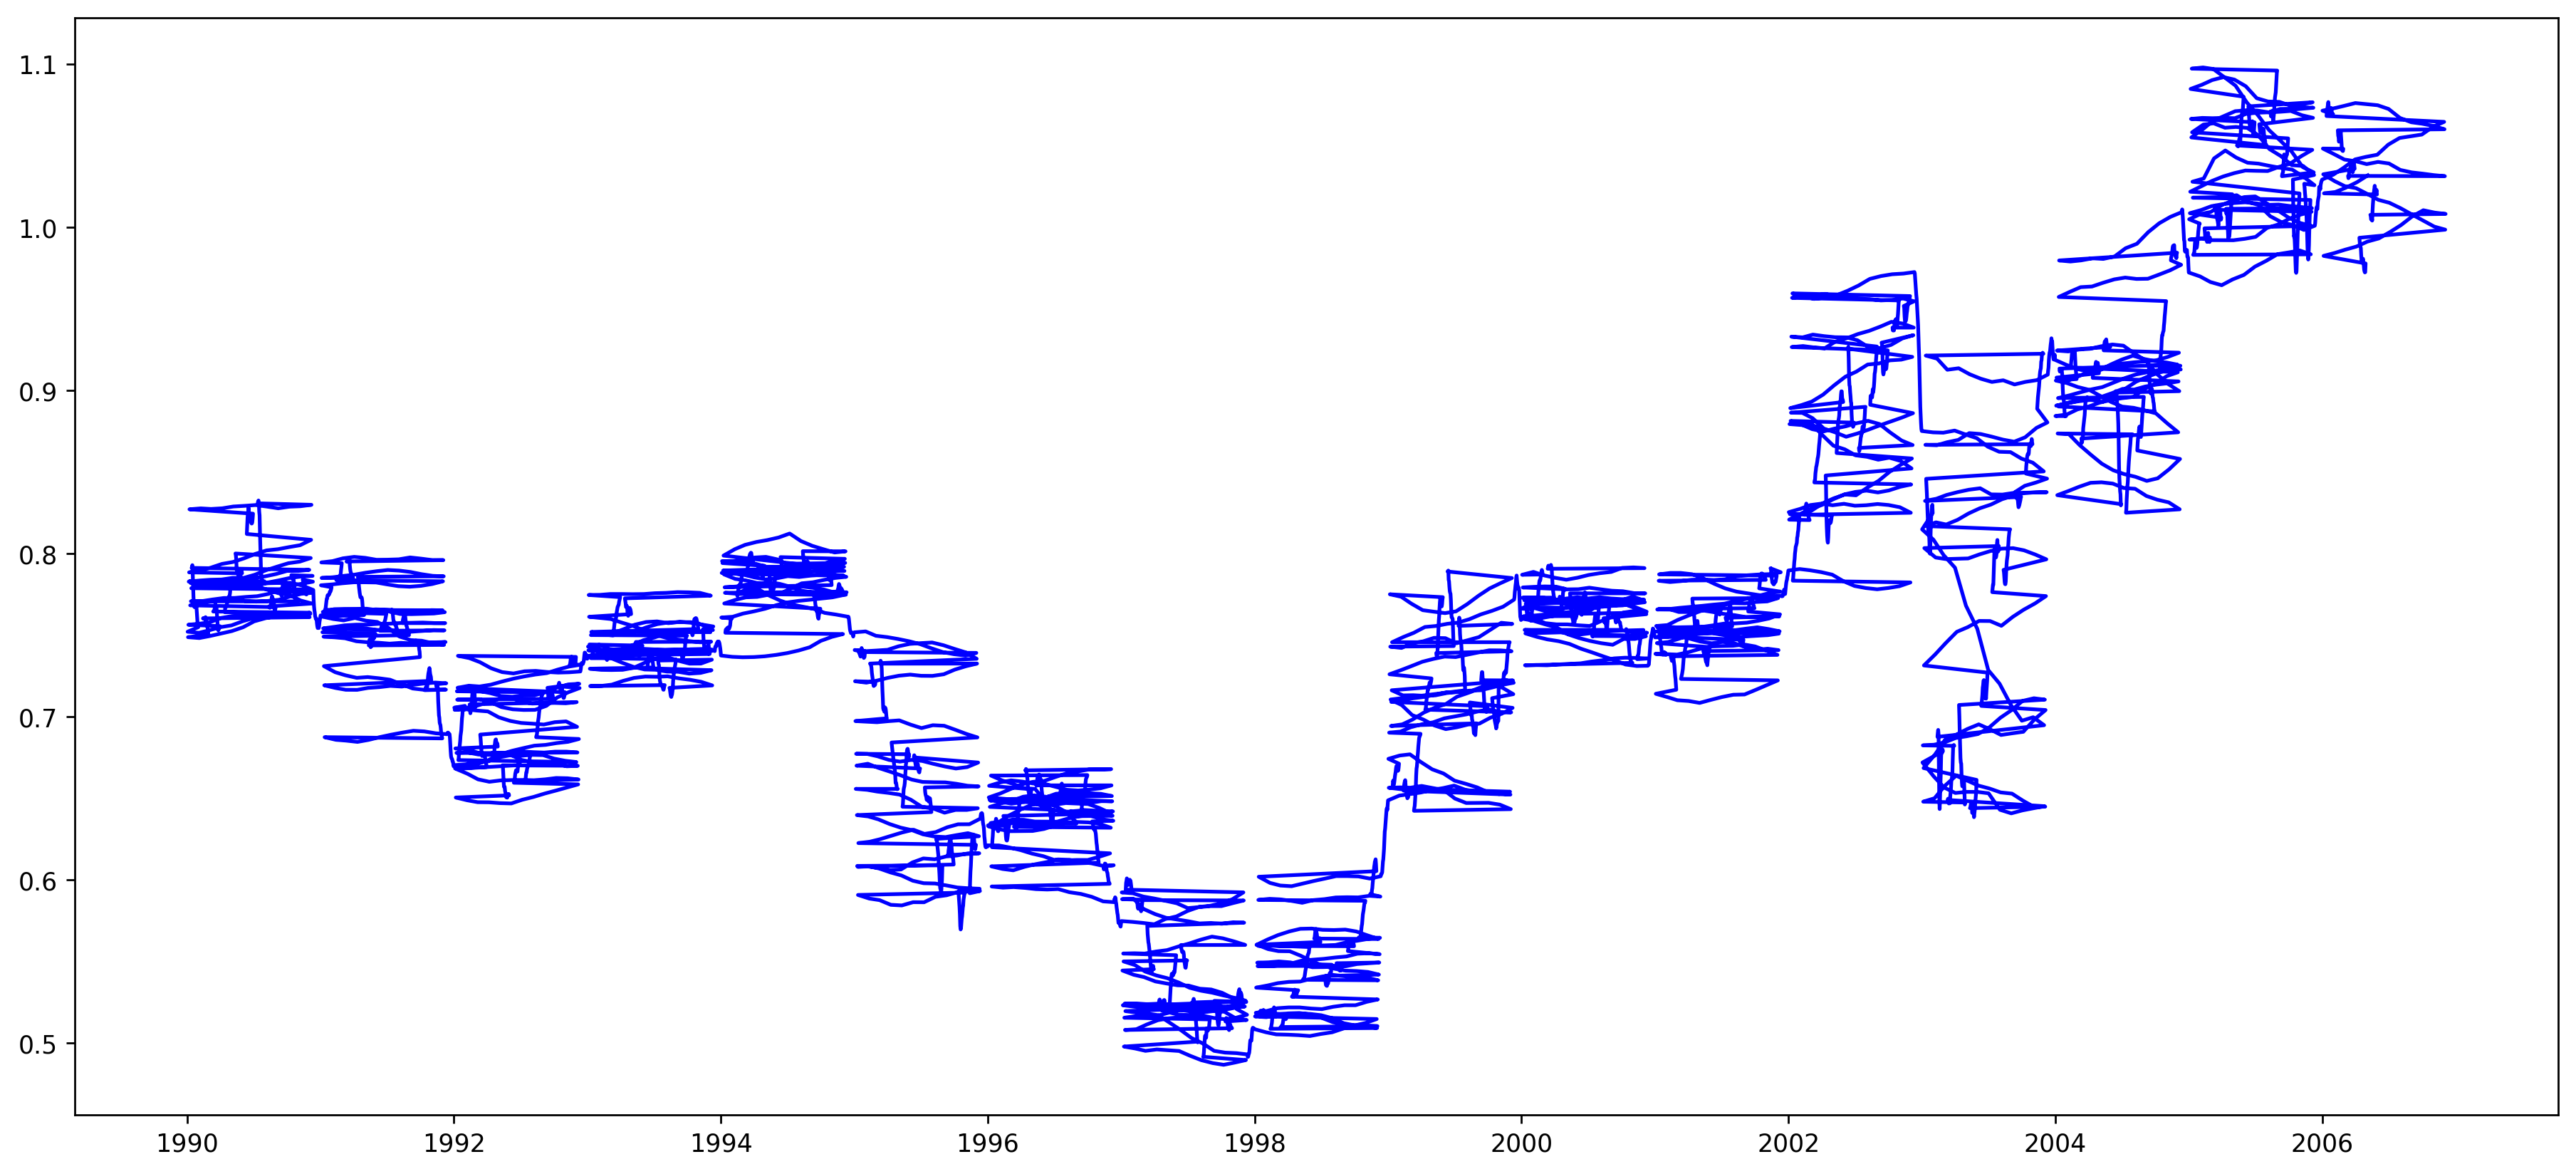

In [88]:
# Simple Exponential Smoothing
data = df[1:6000]
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.3, optimized=False)
# fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.4, optimized=False)

plt.figure(figsize=(18,8))
plt.plot(fit1.fittedvalues, color = 'blue')
# plt.plot(fit2.fittedvalues, color = 'red')
plt.show()